In [2]:
import numpy as np

In [3]:
yreal = np.array([6, 7, 6, 4, 5, 6, 8])
ypred = np.array([6.4, 7.1, 5.9, 4.2, 5.2, 6.2, 7.5])
delty = ypred - yreal
delty@delty

0.5500000000000004

In [4]:
Xd = np.array([1, 3, 5])
X = np.column_stack((np.ones(3), Xd))
Yd = np.array([2.1, 2.9, 4.1])
X

array([[1., 1.],
       [1., 3.],
       [1., 5.]])

In [5]:
w_d = np.linalg.inv(X.T@X)@X.T@Yd
print(w_d)

[1.53333333 0.5       ]


In [6]:
new1=np.array([[1, 1]])
Prod_pr = (new1@w_d)
print('prediction:', Prod_pr)

# new1=np.array([[1, 1]])
Prod_pr2 = (X@w_d)
print('prediction: X', Prod_pr2)

0.1*0.1 + (2.9-4)*(2.9-4)+(4.1-6)*(4.1-6)
# Prod_pred = Prod_pr.tolist()[0][0]
# print('Abcolut error: {:.0f} thou. mcf/day'.format((Prod_new - Prod_pred)))

prediction: [2.03333333]
prediction: X [2.03333333 3.03333333 4.03333333]


4.830000000000002

# Частные производные

In [7]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b

print(diff(f, a))

2*a + 5*b - cos(c)


In [8]:
from sympy import Pow
from sympy import solveset, Eq
x = symbols('x')
f31 = -2*Pow(x,3) - 3*Pow(x,2) +12*x - 4
solveset(Eq(f31.diff(x), 0), x)



{-2, 1}

In [9]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])
sol

[(-2, -1), (-1, -2), (1, 2), (2, 1)]

In [10]:
# Задание 3.4
z34 = 4*Pow(x, 2) - 6*x*y - 34*x +5*Pow(y, 2) + 42*y + 7
print(z34)

z34_dx = Eq(z34.diff(x),0)
z34_dy = Eq(z34.diff(y), 0)
 
sol34 = solve([z34_dx, z34_dy], [x, y])
sol34

4*x**2 - 6*x*y - 34*x + 5*y**2 + 42*y + 7


{x: 2, y: -3}

In [11]:
# Задание 3.5
f35 = Pow(x, 3) - 2*x*y - Pow(y, 6)
print(f35)

A35 = np.array([[f35.diff(x, 2) , f35.diff(x).diff(y)],
                [f35.diff(x).diff(y), f35.diff(y, 2)]])
A35

x**3 - 2*x*y - y**6


array([[6*x, -2],
       [-2, -30*y**4]], dtype=object)

In [12]:
# Задание 3.9
z39 = Pow(x, 3) + Pow(y, 3) - 3*x*y
print(z39)

z39_dx = Eq(z39.diff(x),0)
z39_dy = Eq(z39.diff(y), 0)
 
sol39 = solve([z39_dx, z39_dy], [x, y])
sol39

x**3 - 3*x*y + y**3


[(0, 0),
 (1, 1),
 ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2),
 ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]

# ОПТИМИЗАЦИЯ

Чтобы реализовать метод оптимизации, нужна функция, для которой его будут применять. Мы возьмём самую известную функцию, используемую для таких целей — функцию Розенброка. Данную функцию можно представить так:

In [19]:
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r


C:\Users\МОТОборг\AppData\Local\Temp\ipykernel_8888\4083220660.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = graph.gca(projection='3d')


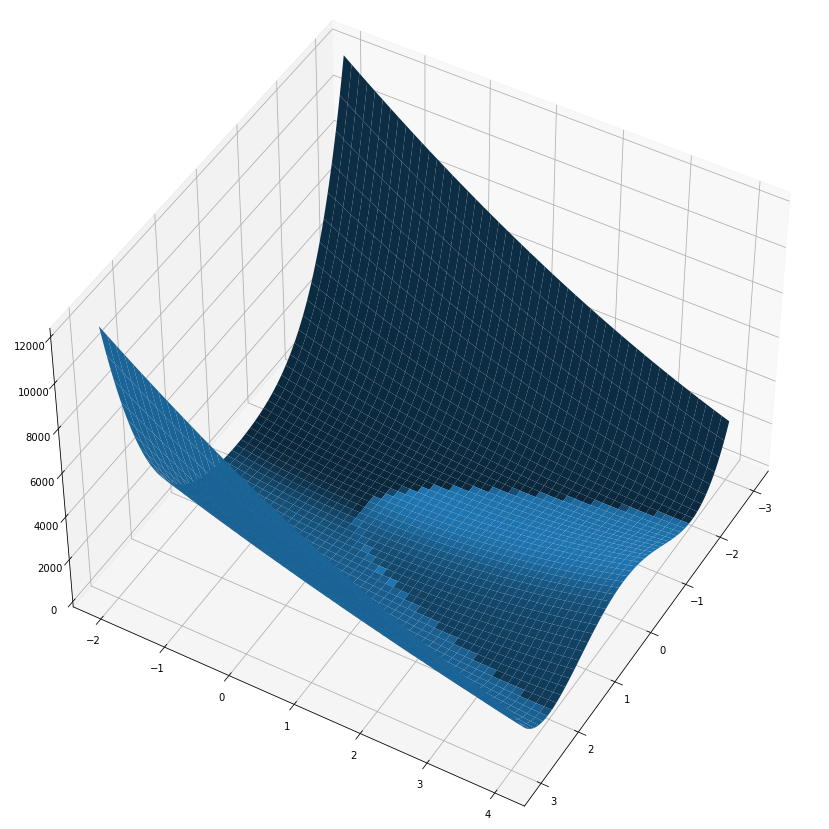

In [24]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.gca(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.002)
x2 = np.arange(-2, 4, 0.002)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, необходимо установить method = 'powell' в функции minim.

Он является самым простым из возможных в плане реализации и используемых вычислений. В следующем модуле мы комплексно рассмотрим все методы и поговорим о том, как выбрать нужный.

In [25]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


Допустим, у нас есть некоторая точка  в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом):

In [26]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, которая фигурировала в наших решениях до этого.

Для реализации этого алгоритма используется функция least_squares.

In [33]:
# least_squares

from scipy.optimize import minimize
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
# result_point = minimize(func_rosen, x1, method='SLSQP')
result_point = least_squares(func_rosen, x1)
print(result_point.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076161]


У нас есть два станка для производства пластиковых упаковок. Станки разных моделей, поэтому при их использовании получаются разные издержки, зависящие от произведённых упаковок и выражаемые следующими функциями:

Здесь  — это количество упаковок, произведённых на первом станке, а  — количество упаковок, произведённых на втором станке.

Нам заказали 200 упаковок. Мы хотим выполнить заказ, минимизировав расходы на изготовление товаров. Чтобы узнать, как мы можем сэкономить, необходимо решить задачу оптимизации.

In [34]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))


Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [41]:
x,y,w=symbols(' x y w' )
# g = Pow((2-x)*(2-x) + (1-y)*(1-y),0.5)
g = ((x-2)**2+(y-1)**2)**(0.5)
print('Целевая функция для аргументов a и b :\n f = ', g)
q = x + y - 1
print('Функция ограничений: ', q,'= 0')
# f = Pow((2-x)*(2-x) + (1-y)*(1-y),0.5) + w*(x + y - 1)
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
print('Функция Лагранжа :\n ',f)
fx = f.diff(x)
print('df/da =',fx,'= 0')
fy = f.diff(y)
print('df/db =',fy,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fx,fy,fw],x,y,w)
# print('Стационарная точка M(x,y):\n',float(sols[x]),',',float(sols[y]))
# print('Стационарная точка M(x,y):\n',sols[x],',',sols[y])
sols

Целевая функция для аргументов a и b :
 f =  ((x - 2)**2 + (y - 1)**2)**0.5
Функция ограничений:  x + y - 1 = 0
Функция Лагранжа :
  w*(x + y - 1) + ((x - 2)**2 + (y - 1)**2)**0.5
df/da = w + (1.0*x - 2.0)/((x - 2)**2 + (y - 1)**2)**0.5 = 0
df/db = w + (1.0*y - 1.0)/((x - 2)**2 + (y - 1)**2)**0.5 = 0
df/dw = x + y - 1 = 0


[(1.00000000000000, 0.0, 0.707106781186548)]

In [68]:
a,b,c,w=symbols('a b c w')
g = 2*(a*b + a*c + b*c)

L = 2*(a*b + a*c + b*c) + w*(a*b*c - 1)

L_a = L.diff(a)
L_b = L.diff(b)
L_c = L.diff(c)
L_w = L.diff(w)

print(solve([L_a, L_b, L_c, L_w], a, b, c, w, dict=True)[0])
solve([L_a, L_b, L_c, L_w], a, b, c, w, dict=True)

{a: 1, b: 1, c: 1, w: -4}


[{a: 1, b: 1, c: 1, w: -4},
 {a: -1/2 - sqrt(3)*I/2,
  b: -1/2 - sqrt(3)*I/2,
  c: -1/2 - sqrt(3)*I/2,
  w: 2 - 2*sqrt(3)*I},
 {a: -1/2 + sqrt(3)*I/2,
  b: -1/2 + sqrt(3)*I/2,
  c: -1/2 + sqrt(3)*I/2,
  w: 2 + 2*sqrt(3)*I}]

Длина забора — 20 метров. Какова максимальная площадь прямоугольного участка, который можно огородить? Хотя бы одна из сторон прямоугольника должна быть не меньше 6.

В этой системе мы не можем найти все переменные, однако можем решить её отчасти (найти  и ).

Это можно сделать с помощью следующего кода (для удобства переменные обозначены другими буквами):

In [44]:
from sympy import *
a,b,c,x,y,w=symbols('a b c x y w' )
fa = -x+a+b
fb=-y+a
fc=2*b*c
fx=x+y-10
fy = -x + 6 + c
sols = solve([fa,fb,fc,fx,fy],a,b,c,x,y,w)
print(sols[0])

(4, 2, 0, 6, 4, w)


Получаем, что значения x и y равны 6 и 4 соответственно, а значит максимальная площадь равна 24.

# ВЫЧИСЛЕНИЕ ГРАДИЕНТА ДЛЯ ЧИСЛОВЫХ ВЕКТОРОВ 

Для вычисления градиента в Python есть специальная функция — gradient() из библиотеки NumPy. Градиент вычисляется на заданной -мерной сетке с шагом, который можно задать вручную.

Такой градиент немного отличается от того, который мы обсудили ранее, поскольку это градиент для численных значений, а не для функций (хотя он обозначается так же и аналогичен по смыслу). Однако он тоже используется в DS, особенно в задачах компьютерного зрения.

Например, пусть у нас есть чёрно-белая фотография. Тогда вектор градиента может быть вычислен для каждого пикселя изображения. Это просто мера изменения значений пикселей вдоль направлений  и  вокруг каждого пикселя. То есть производная для функции характеризует скорость её изменения, а производная для численного вектора характеризует, как быстро меняются его значения — таким образом, смысл один и тот же.

In [45]:
# Зададим массив, для которого хотим найти градиент, и вычислим его:
f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)
 
np.gradient(f)

C:\Users\МОТОборг\AppData\Local\Temp\ipykernel_8888\998114261.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)


array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем обычную разность для соседних элементов массива:

А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2, то есть, по сути, среднее арифметическое для значений:

In [46]:
print(f[1] - f[0], f[-1] - f[-2])
(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

4.0 11.0


12.0

Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину обычного шага у края и удвоенную величину шага для элементов внутри вектора:

In [49]:
np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

2.75
4.0
5.5
6.0


In [50]:
f67 = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f67, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

# ГРАДИЕНТНЫЙ СПУСК

Мы разобрались с тем, как работает градиентный спуск в теории. Теперь давайте рассмотрим визуализацию данного процесса. Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

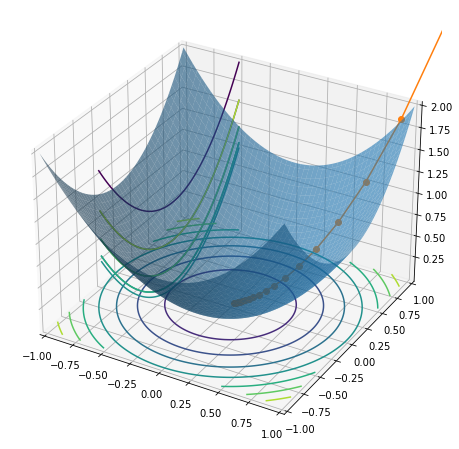

In [70]:
# Определим функцию
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

# Определим функцию, которая вычислит градиент:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

# Простейший вариант для градиентного спуска:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

# Напишем функцию, которая будет строить график:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)       # alpha - прозрачность
    ax.contour(x, y, z, zdir='x', offset=x.min()/2)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

# Визуализируем и получим следующее движение градиентного спуска к минимуму:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [74]:
# Задание 7.7
def grad77(x, y, z):
    return np.array([4*x-4*z+4, 8*y-8*z+8, -4*x-8*y+18*z-20])

# Простейший вариант для градиентного спуска:
def grad_descend(grad, step_size=0.25, num_steps=2):
    lst = []
    x = [0,0,0]
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1], lst[-1][2])
        lst.append(x)
    return np.array(lst)

trace77 = grad_descend(grad77, step_size=0.25, num_steps=1)
trace77

array([[ 0.,  0.,  0.],
       [-1., -2.,  5.]])